In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
pd.options.mode.chained_assignment = None

stock_data = pd.read_csv('fulldata.csv')
stock_data["FutureOne"]= stock_data.Close.shift(-1)
stock_data["FutureThree"]= stock_data.Close.shift(-3)
stock_data["FutureFive"]= stock_data.Close.shift(-5)
modelOne = load_model('FutureOne.h5')
modelThree = load_model('FutureThree.h5')
modelFive = load_model('FutureFive.h5')

In [2]:
target = ['FutureOne']
features = ['Transaction','Open', 'High', 'Low','Close','ForeignNet','TrustNet','DealerNet']
df = stock_data[features + target]
split = int(df.shape[0] * 0.8)
df_test = df.iloc[split:, :].copy()

In [3]:
target_scaler = MinMaxScaler().fit(df[target])
features_scaler = MinMaxScaler().fit(df[features])
df_test[features] = features_scaler.transform(df_test[features])

# extract the input sequences and output values
sequence_length = 3
X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)

In [4]:
y_predOne = modelOne.predict(X_test)
y_predOne = target_scaler.inverse_transform(y_predOne)
df['PredictedOne'] = np.nan
df['PredictedOne'].iloc[- y_predOne.shape[0]:] = y_predOne.flatten()

y_predThree = modelThree.predict(X_test)
y_predThree = target_scaler.inverse_transform(y_predThree)
df['PredictedThree'] = np.nan
df['PredictedThree'].iloc[- y_predThree.shape[0]:] = y_predThree.flatten()

y_predFive = modelFive.predict(X_test)
y_predFive = target_scaler.inverse_transform(y_predFive)
df['PredictedFive'] = np.nan
df['PredictedFive'].iloc[- y_predFive.shape[0]:] = y_predFive.flatten()

res=pd.concat([stock_data['DateTime'],df],axis=1)
test=res[['DateTime','Open','Close', 'PredictedOne','PredictedThree','PredictedFive']].dropna().reset_index(drop=True)
test

16/16 [==============================] - 0s 2ms/step


,DateTime,Open,Close,PredictedOne,PredictedThree,PredictedFive
0,2021-03-29,599.0,599.0,578.930176,587.592407,569.149048
1,2021-03-30,600.0,597.0,591.013916,596.378296,573.446289
2,2021-03-31,596.0,587.0,600.747681,604.412415,579.744507
3,2021-04-01,598.0,602.0,602.934937,607.007019,581.895874
4,2021-04-06,615.0,610.0,602.789429,607.095276,582.444153
...,...,...,...,...,...,...
495,2023-04-11,522.0,524.0,537.441406,544.002869,520.161133
496,2023-04-12,523.0,520.0,536.341125,543.779785,519.373230
497,2023-04-13,515.0,510.0,532.195496,540.505127,516.141785
498,2023-04-14,516.0,516.0,526.795166,535.603333,512.023682


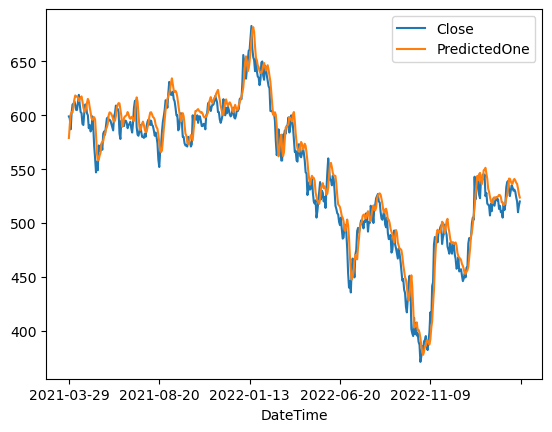

In [5]:
plot=test.plot(x='DateTime',y=['Close','PredictedOne'])
fig = plot.get_figure()
fig.savefig('PredictedOne.png')

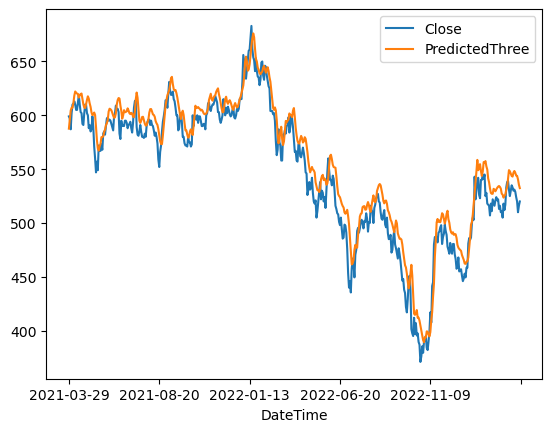

In [6]:
plot2=test.plot(x='DateTime',y=['Close','PredictedThree'])
fig2 = plot2.get_figure()
fig2.savefig('PredictedThree.png')

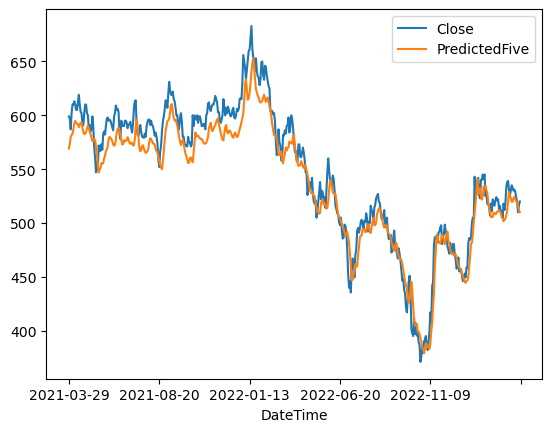

In [7]:
plot3=test.plot(x='DateTime',y=['Close','PredictedFive'])
fig3 = plot3.get_figure()
fig3.savefig('PredictedFive.png')

In [14]:
modelnow = load_model('nowstock.h5')
target = ['Close']
features = ['Transaction','Open', 'High', 'Low']
df = stock_data[features + target]

# split the data
split = int(df.shape[0] * 0.8)
df_train = df.iloc[:split, :].copy()
df_test = df.iloc[split:, :].copy()

# scale the data
target_scaler = MinMaxScaler().fit(df_train[target])

features_scaler = MinMaxScaler().fit(df_train[features])
df_test[features] = features_scaler.transform(df_test[features])

# extract the input sequences and output values
sequence_length = 5
X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features + target].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)



y_prednow = modelnow.predict(X_test)
y_prednow = target_scaler.inverse_transform(y_prednow)
df['PredictedNow'] = np.nan
df['PredictedNow'].iloc[- y_prednow.shape[0]:] = y_prednow.flatten()

res=pd.concat([stock_data['DateTime'],df],axis=1)
test=res[['DateTime','Open','Close', 'PredictedNow']].dropna().reset_index(drop=True)
test

16/16 [==============================] - 1s 3ms/step


,DateTime,Open,Close,PredictedNow
0,2021-03-31,596.0,587.0,575.336975
1,2021-04-01,598.0,602.0,576.339417
2,2021-04-06,615.0,610.0,577.025024
3,2021-04-07,614.0,610.0,577.301758
4,2021-04-08,606.0,613.0,577.483521
...,...,...,...,...
493,2023-04-11,522.0,524.0,572.946350
494,2023-04-12,523.0,520.0,572.756958
495,2023-04-13,515.0,510.0,572.500061
496,2023-04-14,516.0,516.0,572.083313
